<a href="https://colab.research.google.com/github/leeminjae007/STUDY/blob/main/2022%20Artificial%20Intelligence%20NoteBook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student Notebook
#### This notebook is for you to take notes and save directly to your Google drive and GITHUB.

Please upload your changes so you can review it later.

# Introduction to Python Basics I

## Data Preprocessing

### Import Libraries

In [ ]:
# Lodaing libraries

import os
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


###Import dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# kiad iyt data
df = pd.read_csv('/content/drive/MyDrive/2022 AI/loans.csv', index_col = 'client_id')

In [ ]:
print(df)

          loan_type  loan_amount  repaid  loan_id  loan_start    loan_end  \
client_id                                                                   
46109          home        13672       0    10243  2002-04-16  2003-12-20   
46109        credit         9794       0    10984  2003-10-21  2005-07-17   
46109          home        12734       1    10990  2006-02-01  2007-07-05   
46109          cash        12518       1    10596  2010-12-08  2013-05-05   
46109        credit        14049       1    11415  2010-07-07  2012-05-21   
...             ...          ...     ...      ...         ...         ...   
26945         other        12963       0    10330  2001-11-26  2004-06-11   
26945        credit         1728       1    10248  2004-01-27  2005-06-21   
26945         other         9329       0    10154  2001-12-17  2004-07-22   
26945          home         4197       0    10333  2003-10-16  2005-07-10   
26945          home         3643       0    11434  2010-03-24  2011-12-22   

In [ ]:
#Showing first 5 rows
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
client_id,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [ ]:
# Dimension in out dataframe
df.shape #(443행, 7열)

(443, 7)

In [ ]:
#information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 46109 to 26945
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loan_type    443 non-null    object 
 1   loan_amount  443 non-null    int64  
 2   repaid       443 non-null    int64  
 3   loan_id      443 non-null    int64  
 4   loan_start   443 non-null    object 
 5   loan_end     443 non-null    object 
 6   rate         443 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 27.7+ KB


In [ ]:
#Check datatypes

df.dtypes

loan_type       object
loan_amount      int64
repaid           int64
loan_id          int64
loan_start      object
loan_end        object
rate           float64
dtype: object

### Converting the data types of columns

* loan_id to object
* repaid to category dtype
* loan_(Start and End) to data type



In [ ]:
#loan_id
df['loan_id'] = df['loan_id'].astype('object')

In [ ]:
#repaid
df['repaid'] = df['repaid'].astype('category')

In [ ]:
#loan_start 이거는 날짜여서 바꾸는 방법이 다름
df['loan_start'] = pd.to_datetime(df['loan_start'], format = '%Y-%m-%d')


In [ ]:
#loan_end
df['loan_end'] = pd.to_datetime(df['loan_end'], format = '%Y-%m-%d')

In [ ]:
df.dtypes

loan_type              object
loan_amount             int64
repaid               category
loan_id                object
loan_start     datetime64[ns]
loan_end       datetime64[ns]
rate                  float64
dtype: object

### Summary of the data

In [ ]:
df.describe()

,loan_amount,rate
count,443.000000,443.000000
mean,7982.311512,3.217156
std,4172.891992,2.397168
min,559.000000,0.010000
25%,4232.500000,1.220000
50%,8320.000000,2.780000
75%,11739.000000,4.750000
max,14971.000000,12.620000


In [ ]:
#categorical
df.describe(exclude =[np.number])

,loan_type,repaid,loan_id,loan_start,loan_end
count,443,443.0,443.0,443,443
unique,4,2.0,443.0,430,428
top,home,1.0,10243.0,2007-05-16 00:00:00,2008-08-29 00:00:00
freq,121,237.0,1.0,2,2
first,NaN,NaN,NaN,2000-01-26 00:00:00,2001-08-02 00:00:00
last,NaN,NaN,NaN,2014-11-11 00:00:00,2017-05-07 00:00:00


### MIssing Values

In [ ]:
df.isnull().sum() #이거는 null인 값을 찾아 열 별로 다 더해줘서 나타내는 것

loan_type      0
loan_amount    0
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           0
dtype: int64

###Outliers

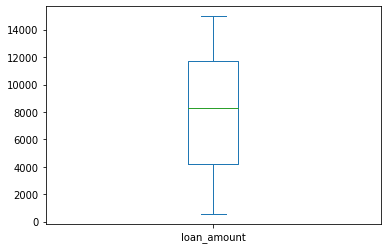

In [ ]:
# 이상치를 찾기 위해 boxplot을 사용
df['loan_amount'].plot(kind = 'box')
plt.show()

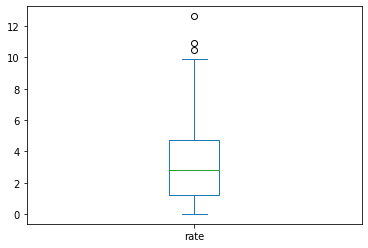

In [ ]:
df['rate'].plot(kind ='box')
plt.show()

### Transfromation



#### SQRT transformation

In [ ]:
df['SQRT_RATE'] = df['rate'] ** 0.5

In [ ]:
df['sqrt_rate'] = np.sqrt(df['rate'])

In [ ]:
df.head()

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,SQRT_RATE,sqrt_rate
client_id,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288,1.466288
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034,1.118034
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621,0.824621
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553,1.113553
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181,1.769181


- Skewness
- Kurtosis


In [ ]:
print('The skewness of the original is {}'.format(df.rate.skew()))
print('The skewness of the SQRT Transformated data is {}'.format(df.SQRT_RATE.skew()))

#분포의 비대칭 정도를 나타는 함수임 양수면  Cs 값이 0보다 크면 왼쪽으로 치우치고 오른쪽으로 긴 꼬리를 가지는 분포를 이룬다. 이를 정적편포라 한다. 반대로 0보다 작으면 오른쪽으로 치우치고 왼쪽으로 긴 꼬리를 가지는 분포를 이룬다. 이를 부적편포라 한다

The skewness of the original is 0.884204614329943
The skewness of the SQRT Transformated data is 0.04964154055528862


In [ ]:
print("The kurtosis of the original data is {}".format(df.rate.kurt()))
print("The kurtosis of the SQRT Transformed data is {}".format(df.SQRT_RATE.kurt()))

# 정규분포의 꼬리와 얼마나 다른지 나타내는 방법으로 첨도가 3이 정규분포와 같은 꼬리를 가지는 것을 알 수 있다

The kurtosis of the original data is 0.4243716514373652
The kurtosis of the SQRT Transformed data is -0.6318437642052039


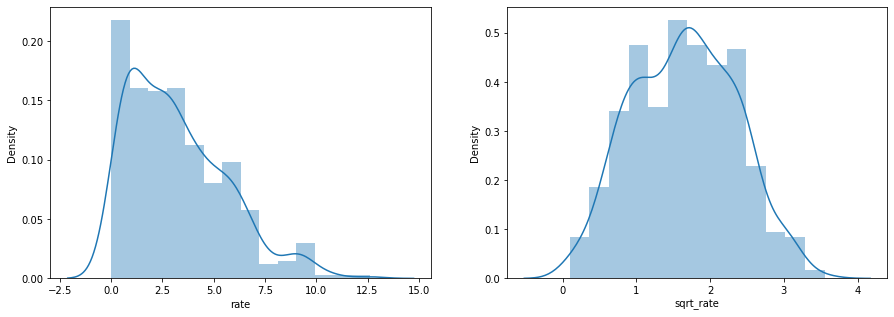

In [ ]:
# plot dist

fig, axes = plt.subplots(1,2, figsize = (15,5))

sns.distplot(df['rate'], ax = axes[0])
sns.distplot(df['sqrt_rate'], ax = axes[1])

### Log Transformation

In [ ]:
df['Log_Rate'] = np.log(df['rate'])

In [ ]:
df

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,SQRT_RATE,sqrt_rate,Log_Rate
client_id,,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288,1.466288,0.765468
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034,1.118034,0.223144
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621,0.824621,-0.385662
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553,1.113553,0.215111
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181,1.769181,1.141033
...,...,...,...,...,...,...,...,...,...,...
26945,other,12963,0,10330,2001-11-26,2004-06-11,2.46,1.568439,1.568439,0.900161
26945,credit,1728,1,10248,2004-01-27,2005-06-21,5.27,2.295648,2.295648,1.662030
26945,other,9329,0,10154,2001-12-17,2004-07-22,5.65,2.376973,2.376973,1.731656


In [ ]:
print('The skewness of the original is {}'.format(df.rate.skew()))
print('The skewness of the SQRT Transformated data is {}'.format(df.SQRT_RATE.skew()))
print('The skewness of the LOG Transformated data is {}'.format(df['Log_Rate'].skew()))

The skewness of the original is 0.884204614329943
The skewness of the SQRT Transformated data is 0.04964154055528862
The skewness of the LOG Transformated data is -1.5943217626331552


In [ ]:
print("The kurtosis of the original data is {}".format(df.rate.kurt()))
print("The kurtosis of the SQRT Transformed data is {}".format(df.SQRT_RATE.kurt()))
print("The kurtosis of the LOG Transformed data is {}".format(df.Log_Rate.kurt()))

The kurtosis of the original data is 0.4243716514373652
The kurtosis of the SQRT Transformed data is -0.6318437642052039
The kurtosis of the LOG Transformed data is 4.157026150198228


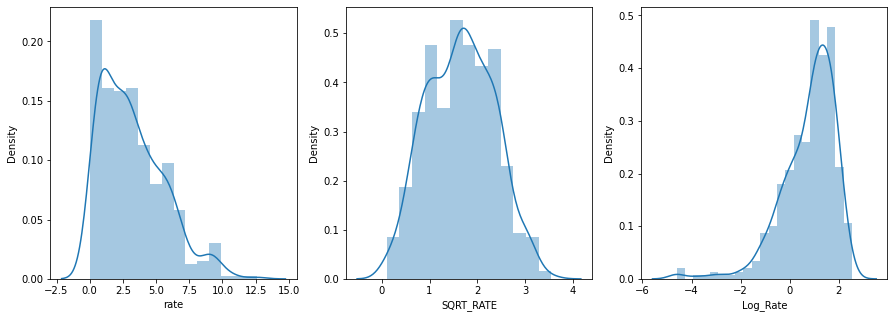

In [ ]:
#plot
fig,axes = plt.subplots(1,3, figsize = (15,5)) #1line, 3row

sns.distplot(df['rate'], ax = axes[0])
sns.distplot(df['SQRT_RATE'], ax = axes[1])
sns.distplot(df['Log_Rate'], ax = axes[2])

In [ ]:
## BoxCox ~homework~

In [ ]:
from scipy import stats

x_trans = stats.boxcox(df['rate'])
print(x_trans)

(array([ 0.90401395,  0.23402044, -0.355832  ,  0.2252077 ,  1.46682142,
        0.76495552,  3.7584864 ,  1.94802019,  2.49121696,  2.00046819,
        2.851473  , -0.60072798, -0.14610988,  2.67395192,  1.30145326,
        0.26887073,  1.5535122 ,  1.46163832, -0.22434516,  1.95242407,
        0.76495552, -0.20159764, -0.1791718 ,  2.86166062, -1.69781317,
       -1.30419882,  1.91701974,  1.70042272,  0.36982856,  2.67038544,
        1.1948596 ,  1.98743692,  0.55029653,  1.54344909,  2.47618979,
        2.05207083,  0.20745842,  0.13472954,  1.84953847, -0.67757428,
        0.00997131,  4.02646817, -0.12443675, -0.82944133,  1.77589584,
        0.76495552,  1.13110632,  0.17144954,  0.19852083,  2.60559047,
       -0.10304589,  1.30145326,  3.64781205,  0.59493594,  1.16607538,
        2.8480711 ,  0.44233432,  0.06863669,  2.85826776, -0.70968917,
        3.45008394,  1.48231368,  1.86315234,  2.97527887,  0.34506893,
        2.09023994,  1.50283865, -0.50025366,  1.42508529,  0.2

#### Z-score

In [ ]:
import scipy.stats as stats

df['ZR'] = stats.zscore(df['rate'])   #zscore는 표준정규분포를 따르는 값임

In [ ]:
df.head()


,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,SQRT_RATE,sqrt_rate,Log_Rate,ZR
client_id,,,,,,,,,,,
46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288,1.466288,0.765468,-0.445677
46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034,1.118034,0.223144,-0.821544
46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621,0.824621,-0.385662,-1.059594
46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553,1.113553,0.215111,-0.825721
46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181,1.769181,1.141033,-0.036399


In [ ]:
#Combined Lower limit and Upper limit

df[(df['ZR'] < -3) | (df['ZR'] > 3)]

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,SQRT_RATE,sqrt_rate,Log_Rate,ZR
client_id,,,,,,,,,,,
41480,credit,2947,1,10302,2005-11-10,2008-03-16,10.49,3.238827,3.238827,2.350422,3.037362
48177,other,6318,0,10224,2003-02-02,2005-05-08,10.89,3.300000,3.300000,2.387845,3.204415
49624,home,8133,1,10312,2009-03-14,2011-03-21,12.62,3.552464,3.552464,2.535283,3.926916


In [ ]:
#count of outliers:
df[(df['ZR'] < -3) | (df['ZR'] > 3)].shape[0] #shape[0]은 데이터의 개수를 알려준다.

3

In [ ]:
## Cleaned data: without outliers
df2 = df[(df['ZR'] >= -3) & (df['ZR'] <= 3)].reset_index()
df2.head()


,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,SQRT_RATE,sqrt_rate,Log_Rate,ZR
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288,1.466288,0.765468,-0.445677
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034,1.118034,0.223144,-0.821544
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621,0.824621,-0.385662,-1.059594
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553,1.113553,0.215111,-0.825721
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181,1.769181,1.141033,-0.036399


In [ ]:
df.shape

(443, 11)

In [ ]:
df2.shape

(440, 12)

In [ ]:
df3 = df2.copy()

In [ ]:
df3.drop(columns = ['ZR', 'SQRT_RATE', 'sqrt_rate', 'Log_Rate'], inplace = True)
df3.head

<bound method NDFrame.head of      client_id loan_type  loan_amount repaid loan_id loan_start   loan_end  \
0        46109      home        13672      0   10243 2002-04-16 2003-12-20   
1        46109    credit         9794      0   10984 2003-10-21 2005-07-17   
2        46109      home        12734      1   10990 2006-02-01 2007-07-05   
3        46109      cash        12518      1   10596 2010-12-08 2013-05-05   
4        46109    credit        14049      1   11415 2010-07-07 2012-05-21   
..         ...       ...          ...    ...     ...        ...        ...   
435      26945     other        12963      0   10330 2001-11-26 2004-06-11   
436      26945    credit         1728      1   10248 2004-01-27 2005-06-21   
437      26945     other         9329      0   10154 2001-12-17 2004-07-22   
438      26945      home         4197      0   10333 2003-10-16 2005-07-10   
439      26945      home         3643      0   11434 2010-03-24 2011-12-22   

     rate  
0    2.15  
1    1.25

In [ ]:
df3.shape

(440, 8)

In [ ]:
# find the quantiles

Q1 = df3.rate.quantile(0.25)
Q2 = df3.rate.quantile(0.50)
Q3 = df3.rate.quantile(0.75)

print(Q1,Q2,Q3)

# IQR

IQR = Q3 - Q1
print(IQR)

#Lower Limit
LC = Q1 - (1.5 * IQR)
print(LC)

#Upper Limit
UC = Q3 + (1.5 * IQR)

print(UC)

1.2175 2.7649999999999997 4.68
3.4624999999999995
-3.9762499999999994
9.87375


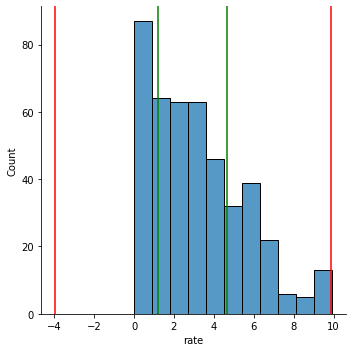

In [ ]:
## Plot
sns.displot(df3.rate)
plt.axvline(UC, color = 'r')
plt.axvline(LC, color = 'r')
plt.axvline(Q1, color = 'g')
plt.axvline(Q3, color = 'g')

In [ ]:
# count the outliers

df[(df['ZR'] < -3) | (df['ZR'] > 3)]

,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,SQRT_RATE,sqrt_rate,Log_Rate,ZR
client_id,,,,,,,,,,,
41480,credit,2947,1,10302,2005-11-10,2008-03-16,10.49,3.238827,3.238827,2.350422,3.037362
48177,other,6318,0,10224,2003-02-02,2005-05-08,10.89,3.300000,3.300000,2.387845,3.204415
49624,home,8133,1,10312,2009-03-14,2011-03-21,12.62,3.552464,3.552464,2.535283,3.926916


In [ ]:
#count
df[(df['ZR'] < 3)].shape[0]

440

In [ ]:
#clean data
df2 = df[(df['ZR'] > -3.0) | (df['ZR'] < 3.0)].reset_index()

In [ ]:
df2.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,SQRT_RATE,sqrt_rate,Log_Rate,ZR
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288,1.466288,0.765468,-0.445677
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034,1.118034,0.223144,-0.821544
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621,0.824621,-0.385662,-1.059594
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553,1.113553,0.215111,-0.825721
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181,1.769181,1.141033,-0.036399


In [ ]:
df.shape

(443, 11)

In [ ]:
df2.shape

(443, 12)

### Scaling numerical features


* Standarization (z-score)
* Normalization : Min Max Scalar

#### Standarization (z-score)

In [ ]:
#Manually
avg_rate = df3['rate'].mean()
avg_rate

3.161818181818183

In [ ]:
std_rate = df3['rate'].std()
std_rate

2.307947418822915

In [ ]:
# Step 1 : transform using z-score
df3['Z_Score'] = (df3['rate'] - avg_rate) / std_rate
df3.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,Z_Score
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,-0.438406
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,-0.828363
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,-1.075336
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,-0.832696
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,-0.013786


In [ ]:
# skewness and kurtosis

print('The skewness for the original data is {}'.format(df3.rate.skew()))
print('The kurtosis for the original data is {}'.format(df3.rate.kurt()))
print('')
print('The skewness for the Zscore scaled column  is {}'.format(df3.Z_Score.skew()))
print('The kurtosis for the Zscore scaled column  is {}'.format(df3.Z_Score.kurt()))

The skewness for the original data is 0.7594062707815686
The kurtosis for the original data is -0.05964248048746912

The skewness for the Zscore scaled column  is 0.7594062707815689
The kurtosis for the Zscore scaled column  is -0.05964248048746734


In [ ]:
# for loan_amount
avg_LA = df3['loan_amount'].mean()
print(avg_LA)

7997.195454545455


In [ ]:
std_LA = df3['loan_amount'].std()
print(std_LA)

4179.435966237437


In [ ]:
#Step 1 : transform using Z - score

df3['Z_Score_LA'] = (df3['loan_amount'] - avg_LA) / std_LA
df3.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,Z_Score,Z_Score_LA
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,-0.438406,1.357792
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,-0.828363,0.429916
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,-1.075336,1.133360
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,-0.832696,1.081678
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,-0.013786,1.447996


In [ ]:
# check the skewness and kurtosis

#For Loan_amount
print('The skewness for the original data is {}'.format(df3.loan_amount.skew()))
print('The kurtosis for the original data is {}'.format(df3.loan_amount.kurt()))
print('')
print('The skewness for the Zscore scaled column  is {}'.format(df3.Z_Score_LA.skew()))
print('The kurtosis for the Zscore scaled column  is {}'.format(df3.Z_Score_LA.kurt()))

# 값을 리스케일링 해도 skewness, kurtosis는  변하지 않는다
#transform 을 하면 변할 수 있다

The skewness for the original data is -0.04678765472024289
The kurtosis for the original data is -1.2354309429278456

The skewness for the Zscore scaled column  is -0.04678765472024289
The kurtosis for the Zscore scaled column  is -1.2354309429278456


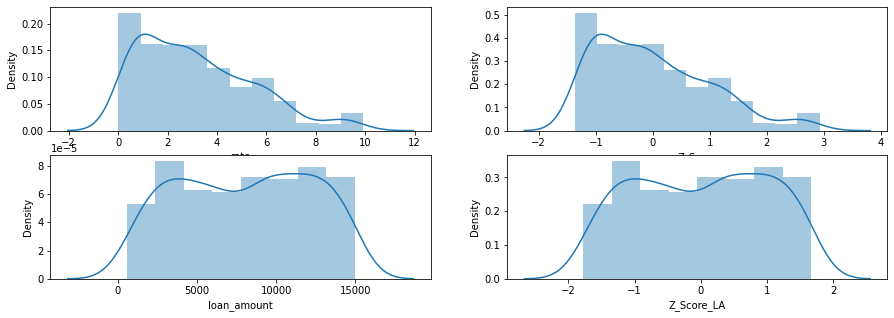

In [ ]:
from IPython.core.pylabtools import figsize
#distribution of the columns
#2,2는 2열 2 행
fig, axis = plt.subplots(2,2, figsize = (15,5))
sns.distplot(df3['rate'], ax=axis[0,0])
sns.distplot(df3['Z_Score'], ax = axis[0,1])
sns.distplot(df3['loan_amount'], ax=axis[1,0])
sns.distplot(df3['Z_Score_LA'], ax=axis[1,1])



####SkLearn

In [ ]:
#Load data

df4 = df3.copy()
df4.drop(columns = ['Z_Score'], inplace = True)
df4.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,Z_Score_LA
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.357792
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,0.429916
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,1.133360
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.081678
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.447996


In [ ]:
# library
from sklearn.preprocessing import StandardScaler


In [ ]:
df4_num = df4[['loan_amount', 'rate']]
df4_num.head()

,loan_amount,rate
0,13672,2.15
1,9794,1.25
2,12734,0.68
3,12518,1.24
4,14049,3.13


In [ ]:
SS = StandardScaler() #스케일링하는 작업으로 평균이랑 표준편차로 계산
scaled_x = SS.fit_transform(df4_num)

In [ ]:
print(scaled_x)

[[ 1.35933754e+00 -4.38905120e-01]
 [ 4.30404933e-01 -8.29305901e-01]
 [ 1.13464987e+00 -1.07655973e+00]
 [ 1.08290942e+00 -8.33643687e-01]
 [ 1.44964378e+00 -1.38020478e-02]
 [-2.54437337e-01 -5.29998635e-01]
 [-4.36007970e-01  2.74069235e+00]
 [ 1.11596582e+00  4.24314384e-01]
 [ 7.34140504e-01  1.00557777e+00]
 [-9.45507623e-01  4.76367821e-01]
 [-1.52806670e+00  1.44369420e+00]
 [ 9.79246704e-02 -1.15463988e+00]
 [ 2.53864621e-01 -9.98479572e-01]
 [-1.07150519e+00  1.22246709e+00]
 [ 6.84076833e-01 -1.48273428e-01]
 [-1.57663543e-01 -8.11954755e-01]
 [ 9.47569836e-01  5.99403219e-02]
 [ 4.95799105e-01 -1.81398342e-02]
 [ 9.60984026e-01 -1.02884408e+00]
 [-1.78173860e+00  4.28652170e-01]
 [ 1.20076266e+00 -5.29998635e-01]
 [-9.93175902e-01 -1.02016850e+00]
 [ 1.01038679e-01 -1.01149293e+00]
 [ 9.10680816e-01  1.45670756e+00]
 [ 5.80835484e-01 -1.34984027e+00]
 [ 1.67049882e+00 -1.30646241e+00]
 [-9.26104956e-01  3.93949879e-01]
 [-8.47775672e-01  1.90073915e-01]
 [ 4.18725224e-02 -7

### Normalization : Min Max Scalar

* (x - min) / (max - min)


In [ ]:
#manually
#For rate variable

min_rate = df4.rate.min()
min_rate

0.01

In [ ]:
max_rate = df4['rate'].max()
max_rate

9.91

In [ ]:
df4['Min_Max_Rate'] = (df4['rate'] - min_rate) / (max_rate - min_rate)

In [ ]:
print('The skewness for the original data is {}'.format(df4.rate.skew()))
print('The skewness for the Zscore data is {}'.format(df3.Z_Score.skew()))
print('The skewness for the Min Max data is {}'.format(df4.Min_Max_Rate.skew()))
print('')
print('The kurtosis for the Zscore scaled column  is {}'.format(df4.rate.kurt()))
print('The kurtosis for the Zscore scaled column  is {}'.format(df3.Z_Score.kurt()))
print('The kurtosis for the Zscore scaled column  is {}'.format(df4.Min_Max_Rate.kurt()))


The skewness for the original data is 0.7594062707815686
The skewness for the Zscore data is 0.7594062707815689
The skewness for the Min Max data is 0.7594062707815686

The kurtosis for the Zscore scaled column  is -0.05964248048746912
The kurtosis for the Zscore scaled column  is -0.05964248048746734
The kurtosis for the Zscore scaled column  is -0.05964248048746823


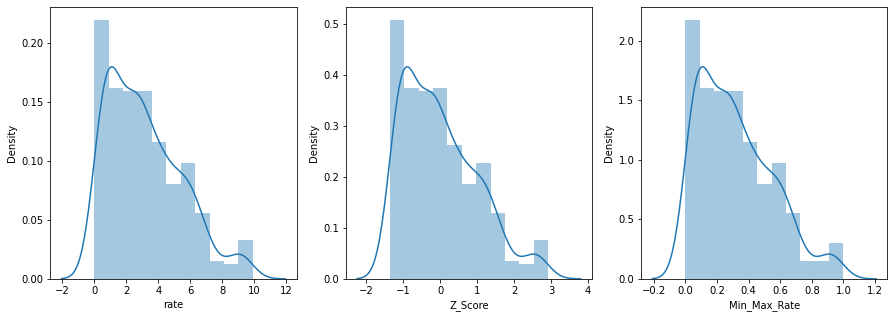

In [ ]:
# distribution

# Rate
fig, axes = plt.subplots(1,3, figsize = (15,5))

sns.distplot(df3['rate'], ax = axes[0])
sns.distplot(df3['Z_Score'], ax = axes[1])
sns.distplot(df4['Min_Max_Rate'], ax = axes[2])

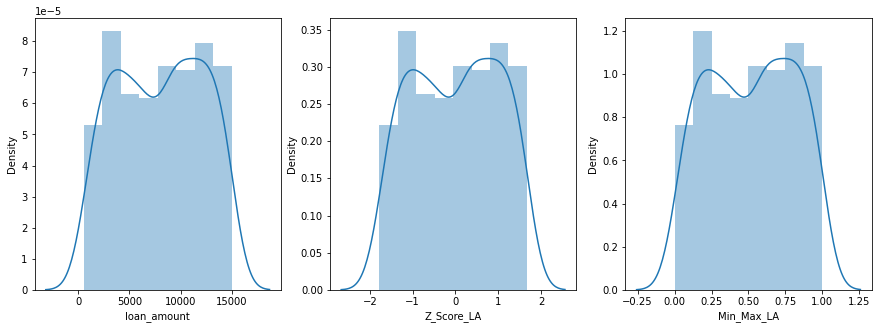

In [ ]:
# Right now you have to do it for Loan_amount

#Loan_amount
min_LA = df4['loan_amount'].min()
max_LA = df4['loan_amount'].max()
df4['Min_Max_LA'] = (df4['loan_amount'] - min_LA) / (max_LA - min_LA)

fig, axes = plt.subplots(1,3 , figsize = (15,5))

sns.distplot(df3['loan_amount'], ax = axes[0])
sns.distplot(df4['Z_Score_LA'], ax = axes[1])
sns.distplot(df4['Min_Max_LA'], ax = axes[2])

In [ ]:
print('The skewness for the original data is {}'.format(df4.loan_amount.skew()))
print('The skewness for the Zscore data is {}'.format(df3.Z_Score_LA.skew()))
print('The skewness for the Min Max data is {}'.format(df4.Min_Max_LA.skew()))
print('')
print('The kurtosis for the original data  is {}'.format(df4.loan_amount.kurt()))
print('The kurtosis for the Zscore data  is {}'.format(df3.Z_Score_LA.kurt()))
print('The kurtosis for the Min Max data  is {}'.format(df4.Min_Max_LA.kurt()))

The skewness for the original data is -0.04678765472024289
The skewness for the Zscore data is -0.04678765472024289
The skewness for the Min Max data is -0.04678765472024256

The kurtosis for the original data  is -1.2354309429278456
The kurtosis for the Zscore data  is -1.2354309429278456
The kurtosis for the Min Max data  is -1.2354309429278452


###by SkLearn

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
ms = MinMaxScaler()

MinMaxScaled = ms.fit_transform(df4_num) #minmaxscaler로 바꿔주는 즉 rescale해주는 작업

In [ ]:
print(MinMaxScaled)

[[0.90986678 0.21616162]
 [0.64078546 0.12525253]
 [0.84478213 0.06767677]
 [0.82979462 0.12424242]
 [0.93602553 0.31515152]
 [0.4424091  0.19494949]
 [0.38981404 0.95656566]
 [0.83936997 0.41717172]
 [0.72876769 0.55252525]
 [0.2422287  0.42929293]
 [0.07348043 0.65454545]
 [0.54447682 0.04949495]
 [0.58964752 0.08585859]
 [0.20573133 0.6030303 ]
 [0.71426589 0.28383838]
 [0.4704413  0.12929293]
 [0.79059117 0.33232323]
 [0.659728   0.31414141]
 [0.79447682 0.07878788]
 [0.         0.41818182]
 [0.86393283 0.19494949]
 [0.22842076 0.08080808]
 [0.54537885 0.08282828]
 [0.77990563 0.65757576]
 [0.68436026 0.0040404 ]
 [1.         0.01414141]
 [0.24784901 0.41010101]
 [0.27053844 0.36262626]
 [0.52824036 0.14141414]
 [0.99826533 0.6020202 ]
 [0.9061199  0.26464646]
 [0.45115182 0.42626263]
 [0.62593672 0.16464646]
 [0.75457952 0.33030303]
 [0.72321676 0.54848485]
 [0.76588954 0.44141414]
 [0.9377602  0.12222222]
 [0.69109076 0.11414141]
 [0.9595476  0.39494949]
 [0.54086872 0.04444444]


### Encoding categorical Predictors

In [ ]:
# Load data
df_loans = df3.copy()

In [ ]:
df_loans.drop(columns = ['Z_Score'], inplace = True)
df_loans.drop(columns = ['Z_Score_LA'], inplace = True)
# df_loans.drop(columns = ['loan_amount_LA'], inplace = True)

In [ ]:
df_loans.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [ ]:
df_loans.dtypes

client_id               int64
loan_type              object
loan_amount             int64
repaid               category
loan_id                object
loan_start     datetime64[ns]
loan_end       datetime64[ns]
rate                  float64
dtype: object

In [ ]:
df_loans.repaid.head()

0    0
1    0
2    1
3    1
4    1
Name: repaid, dtype: category
Categories (2, int64): [0, 1]

In [ ]:
# We will use

!pip install category_encoders

In [ ]:
df_test = pd.DataFrame({
    'City' : ['SF','SF','SF','NYC','NYC','NYC','Seattle','Seattle','Seattle'],
    'Rent' : [1000,1001,1002,1003,1004,1005,1006,1007,1008],
})

#### One-Hot Encoder

In [ ]:
col = 'repaid'

In [ ]:
from category_encoders import OneHotEncoder #이건 결국에 true or false로 나타내기 위해서 사용하는 함수로 repaid 같은 경우 0,1,nan이 존재한다 그래서 0,1,nan일 경우로 카테고리를 나누고 1,0 즉 true false를 나타내는 방법이다.

In [ ]:
onehot_enc = OneHotEncoder (use_cat_names = True, handle_missing = 'indicator', handle_unknown='indic') #usecatnames는 true가 아닌 false로 한다면 nan이 아니라 -2로 표시될 수 있다.

In [ ]:
onehot_enc.fit_transform(df[[col]])

,repaid_0.0,repaid_1.0,repaid_nan
client_id,,,
46109,1,0,0
46109,1,0,0
46109,0,1,0
46109,0,1,0
46109,0,1,0
...,...,...,...
26945,1,0,0
26945,0,1,0
26945,1,0,0


In [ ]:
onehot_enc.mapping[0]['mapping'] #여자키와 남자키의 데이터가 있다고 하자, 여자키와 남자키를 비슷한 군집으로 만들기 위해 사용한다

,repaid_0.0,repaid_1.0,repaid_nan
1,1,0,0
2,0,1,0
-2,0,0,1


In [ ]:
ex_enc = OneHotEncoder(use_cat_names = True)
ex_map = ex_enc.fit_transform(df_test)
ex_enc.mapping[0]['mapping']

,City_SF,City_NYC,City_Seattle
1,1,0,0
2,0,1,0
3,0,0,1
-1,0,0,0
-2,0,0,0


###Dummy Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder as OneHotEncoder_sk

In [ ]:
dummy_enc = OneHotEncoder_sk(drop = 'first',sparse = False)
dummy_enc.fit_transform(df_loans[[col]])

array([[0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],

In [ ]:
dummy_enc.get_feature_names_out()

array(['repaid_1'], dtype=object)

In [ ]:
dummy_enc.categories_

[array([0, 1])]

In [ ]:
dummy_df2 = pd.get_dummies(df_loans[col], prefix = 'repaid', drop_first = 'True')
dummy_df2.head()

,repaid_1
0,0
1,0
2,1
3,1
4,1


In [ ]:
dummy_df2.drop_duplicates()

,repaid_1
0,0
2,1


#### Binary Encoder

In [ ]:
from category_encoders import BinaryEncoder

In [ ]:
bin_encoder = BinaryEncoder()

In [ ]:
bin_encoder.fit_transform(df_loans.repaid)

,repaid_0,repaid_1
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
435,0,1
436,1,0
437,0,1
438,0,1


In [ ]:
bin_encoder.fit_transform(df_loans[col])

,repaid_0,repaid_1
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
435,0,1
436,1,0
437,0,1
438,0,1


In [ ]:
bin_encoder.base_n_encoder.mapping[0]['mapping']

,repaid_0,repaid_1
1,0,1
2,1,0
-1,0,0
-2,0,0


In [ ]:
# ex
ex_enc = BinaryEncoder()
ex_map = ex_enc.fit_transform(df_test)
ex_enc.base_n_encoder.mapping[0]['mapping']

,City_0,City_1
1,0,1
2,1,0
3,1,1
-1,0,0
-2,0,0


### Frequency Encoder CountEncoder

In [ ]:
from category_encoders import CountEncoder

In [ ]:
count_enc = CountEncoder()

In [ ]:
count_enc.fit_transform(df_loans[col])

,repaid
0,205
1,205
2,235
3,235
4,235
...,...
435,205
436,235
437,205
438,205


In [ ]:
count_enc.mapping

{'repaid': 1.0    235
 0.0    205
 Name: repaid, dtype: int64}

In [ ]:
count_enc = CountEncoder(combine_min_nan_groups= True, min_group_size = 500, min_group_name = 'others')

In [ ]:
count_enc.fit_transform(df_loans[[col]])

,repaid
0,205
1,205
2,235
3,235
4,235
...,...
435,205
436,235
437,205
438,205


In [ ]:
count_enc.mapping['repaid']

1.0    235
0.0    205
Name: repaid, dtype: int64

#### Ordinal Encoder

In [ ]:
from category_encoders import OrdinalEncoder

In [ ]:
ord_enc = OrdinalEncoder()

In [ ]:
ord_enc.fit_transform(df_loans['repaid']) #각 라인에 해당하는 값을 배출해준다

,repaid
0,1
1,1
2,2
3,2
4,2
...,...
435,1
436,2
437,1
438,1


In [ ]:
ord_enc.category_mapping[0]['mapping']

0.0    1
1.0    2
NaN   -2
dtype: int64

In [ ]:
ord_enc.mapping[0]['mapping']

0.0    1
1.0    2
NaN   -2
dtype: int64

### Creation new Derived Features

In [ ]:
import datetime as dt

In [ ]:
## 'loan_start' and 'loan_end'

In [ ]:
df_loans['loan_tenure'] = df_loans['loan_end'] - df_loans['loan_start']

In [ ]:
df_loans.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,loan_tenure
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,613 days
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,635 days
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,519 days
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,879 days
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,684 days


In [ ]:
df_loans.dtypes

client_id                int64
loan_type               object
loan_amount              int64
repaid                category
loan_id                 object
loan_start      datetime64[ns]
loan_end        datetime64[ns]
rate                   float64
loan_tenure    timedelta64[ns]
dtype: object

In [ ]:
#transform loan_tenure
df_loans['loan_tenure'] = df_loans['loan_tenure'].dt.days

In [ ]:
df_loans['loan_tenure'] = df_loans['loan_tenure'] / 365

### Training and Testing Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
## Splitting for X and Y variables
Y = df_loans['loan_amount']

X = df_loans.drop('loan_amount', axis = 1)


In [ ]:
# Independent Variables
X.head()

,client_id,loan_type,repaid,loan_id,loan_start,loan_end,rate,loan_tenure
0,46109,home,0,10243,2002-04-16,2003-12-20,2.15,1.679452
1,46109,credit,0,10984,2003-10-21,2005-07-17,1.25,1.739726
2,46109,home,1,10990,2006-02-01,2007-07-05,0.68,1.421918
3,46109,cash,1,10596,2010-12-08,2013-05-05,1.24,2.408219
4,46109,credit,1,11415,2010-07-07,2012-05-21,3.13,1.873973


In [ ]:

Y.head()

0    13672
1     9794
2    12734
3    12518
4    14049
Name: loan_amount, dtype: int64

In [ ]:
#Splitting dataset into Training : 80% and Testing data: 20%

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, train_size = 0.8, random_state = 0 # 이거는 가끔 내 데이터셋이 랜덤으로 가지고 오는건데 우리는 딱 정해진 범위를 가지고와야해서 0을 선택해야함
) #Train 80%, Test 20%

In [ ]:
# Check dimensions
print('The shape of X_train is:', X_train.shape)
print('The shape of X-test is:', X_test.shape)
print('')
print('The shape of Y_train is:', Y_train.shape)
print('The shape of Y_test is:', Y_test.shape)

The shape of X_train is: (352, 8)
The shape of X-test is: (88, 8)

The shape of Y_train is: (352,)
The shape of Y_test is: (88,)


In [ ]:
# median for Y-train
median_y_train = Y_train.median()

# mean Y_test
mean_y_test = Y_test.mean()


print('The median for Y_train variables is:', median_y_train)
print('')
print('The median for Y_test variables is:', mean_y_test)

The median for Y_train variables is: 8412.5

The median for Y_test variables is: 7871.738636363636


In [ ]:
# Homework
# 1. split train, (validation & test 즉 val-test) data를 만들어라 80%, 20%
# 2. split val-test into val - 50% test - 50% 중간고사 시험임